In [1]:
!pip install requests
!pip install BeautifulSoup4
!pip install matplotlib

In [3]:
!pip install -U pip setuptools wheel
!pip install -U spacy


     |████████████████████████████████| 2.1 MB 8.3 MB/s 
     |████████████████████████████████| 953 kB 61.5 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.2/628.2 KB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.0/452.0 KB 20.8 MB/s eta 0:00:00
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installa

In [4]:
from collections import Counter
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [7]:
url = "https://www.amazon.jobs/en/jobs/1665231/programmer-analyst"
page = requests.get(url)
html = page.text

In [8]:
html

'<!DOCTYPE html><html lang="en" prefix="og: http://ogp.me/ns#"><head><script src="//assets.adobedtm.com/launch-ENb97d7f9d2d4b4720ac9782a711994995.min.js" async="async"></script><meta name="viewport" content="width=device-width, initial-scale=1.0" /><meta name="google-site-verification" content="Uw9ZdVAiI0c9UezDVq7iSK0t_nHm3ep2dNvLERS-cwU" /><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta property="og:locale" content="en_US" /><meta property="og:site_name" content="amazon.jobs" /><meta property="og:url" content="https://www.amazon.jobs/en/jobs/1665231/programmer-analyst" /><meta name="twitter:card" content="summary_large_image" /><meta property="og:title" content="Programmer Analyst" /><meta property="og:description" content="As a Programmer Analyst Intern at Amazon, you will work on large scale and highly available applications or tools. You will work with business and operations teams directly to enable new programs and expansion through your unique technology solutions a

In [10]:
soup = BeautifulSoup(html, 'html.parser')


In [28]:
content = soup.find('div', class_='col-12 col-md-7 col-lg-8 col-xl-9')

In [29]:
body_string = ''

In [30]:
for x in iter(content.stripped_strings):
    body_string = body_string + x.lower()

In [16]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.4/777.4 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [31]:
nlp = spacy.load('en_core_web_lg')

In [32]:
doc = nlp(body_string)

In [33]:
nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]

In [34]:
noun_freq = Counter(nouns)

In [38]:
common_nouns = noun_freq.most_common(15)

In [39]:
common_nouns

[('application', 6),
 ('tool', 6),
 ('software', 5),
 ('ability', 5),
 ('technology', 4),
 ('service', 4),
 ('level', 4),
 ('code', 4),
 ('engineering', 4),
 ('programmer', 3),
 ('analyst', 3),
 ('intern', 3),
 ('business', 3),
 ('team', 3),
 ('programming', 3)]

Text(0, 0.5, 'Word')

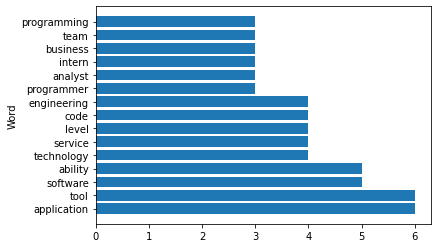

In [40]:
noun_list, noun_occurance = zip(*common_nouns)
plt.figure(0)  # Specify differnt figures
plt.barh(noun_list, noun_occurance)
plt.ylabel('Word')